In [1]:
import urllib.request
import zipfile
import os

# URL du dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

# Chemin où tu veux sauvegarder le zip
save_path = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered.zip"

# Télécharger le fichier
urllib.request.urlretrieve(url, save_path)

# Dossier d'extraction
extract_path = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered"

with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Téléchargement et extraction terminés dans :", extract_path)


✅ Téléchargement et extraction terminés dans : C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered


In [90]:
import os
#base = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered"
base=r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\Projet-Python_Reconnaissance-d-image\cats_and_dogs_filtered"

train = os.path.join(base, 'train')
validation = os.path.join(base, 'validation')

# Sous-dossiers
train_cats = os.path.join(train, 'cats')
train_dogs = os.path.join(train, 'dogs')
validation_cats = os.path.join(validation, 'cats')
validation_dogs = os.path.join(validation, 'dogs')


In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [92]:
from mes_fonctions import *
model1=model_cnn(input_shape=(64,64,3), dense_units=128, dropout_rate=0.4)
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306,625 (1.17 MB)

 Trainable params: 306,625 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
from train_model_cnn import *
model,history=train_cnn_model(train,validation,epochs=10,augment=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 339ms/step - acc: 0.5090 - loss: 0.7117 - val_acc: 0.5460 - val_loss: 0.6905
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 315ms/step - acc: 0.5485 - loss: 0.6928 - val_acc: 0.5650 - val_loss: 0.6728
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - acc: 0.6265 - loss: 0.6472 - val_acc: 0.6380 - val_loss: 0.6180
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - acc: 0.6745 - loss: 0.6096 - val_acc: 0.6880 - val_loss: 0.5912
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - acc: 0.7030 - loss: 0.5763 - val_acc: 0.6670 - val_loss: 0.5981
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - acc: 0.7270 - loss: 0.5451 - val_acc: 0.6830 - val_loss: 0.5692
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - acc: 0.7495 - loss: 0.5077 - val_acc: 0.7160 - val_loss: 0.5669
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 295ms/step - acc: 0.7715 

In [94]:
acc= history.history['acc']
val_acc = history.history['val_acc']

loss_acc= history.history['loss']
val_loss_acc= history.history['val_loss']
epochs = len(acc)

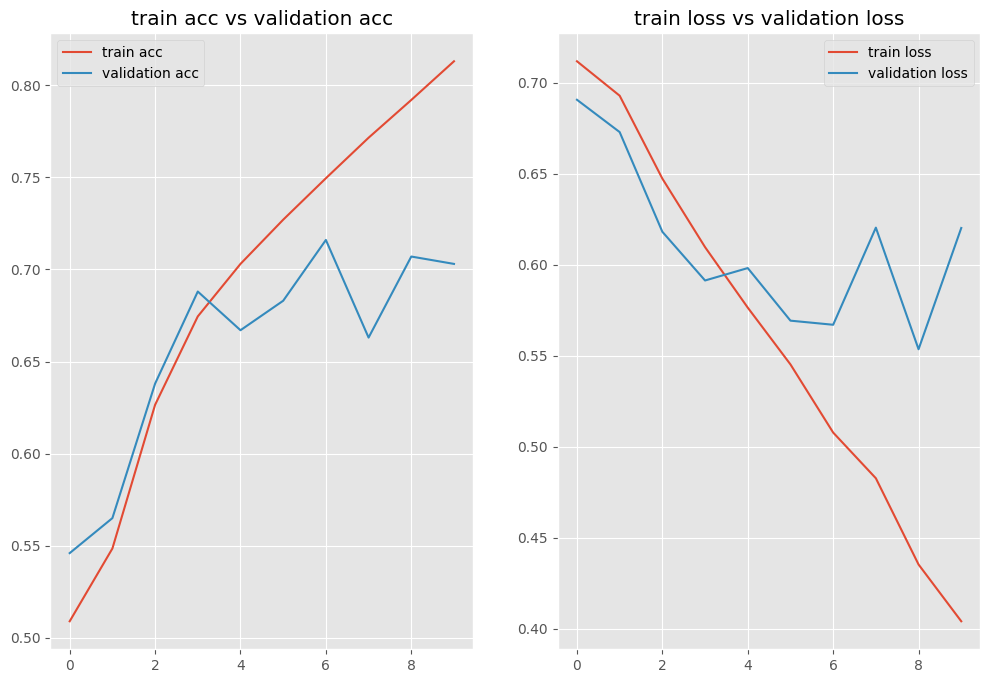

In [95]:

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(epochs),loss_acc,label = "train loss")
plt.plot(np.arange(epochs),val_loss_acc,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()



In [96]:
from pred_alea_img import predict_img

In [97]:
train_generator, validation_generator=creation_generators(train,validation)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


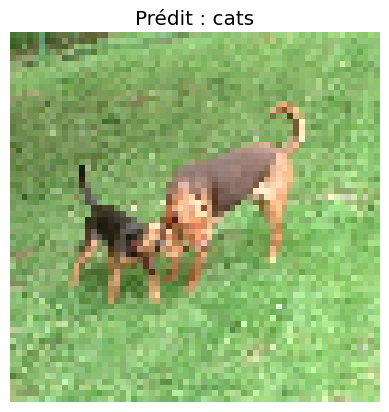

Valeur du modèle: 0.4790
L'animal sur l'image est un : cats


In [98]:
pred = predict_img(model1, train_generator, train, target_size=(64,64))

On a un overfitting(sur-apprentissage)
Notre modèle apprend mal donc on va essayer d'am"liorer notre modèle en  augmentant nos images en appliquant quelques transformations aléatoires telles que la rotation, le zoom, le retournement horizontal,... et en 
augmentant le nombre d'epochs

In [1]:
import os
#base = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered"
base=r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\Projet-Python_Reconnaissance-d-image\cats_and_dogs_filtered"

train = os.path.join(base, 'train')
validation = os.path.join(base, 'validation')

# Sous-dossiers
train_cats = os.path.join(train, 'cats')
train_dogs = os.path.join(train, 'dogs')
validation_cats = os.path.join(validation, 'cats')
validation_dogs = os.path.join(validation, 'dogs')

In [7]:
from train_model_cnn import *
from mes_fonctions import *
model2=model_cnn(input_shape=(150,150,3), dense_units=512, dropout_rate=0.5,)
model2.summary()
model,history=train_cnn_model(train,validation,epochs=40,augment=True,input_shape=(150,150,3),target_size=(150,150))

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,815,937 (26.00 MB)

 Trainable params: 6,813,953 (25.99 MB)

 Non-trainable params: 1,984 (7.75 KB)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - acc: 0.5965 - loss: 0.8863 - val_acc: 0.5000 - val_loss: 1.2677
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - acc: 0.6510 - loss: 0.7625 - val_acc: 0.5000 - val_loss: 2.2659
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - acc: 0.6380 - loss: 0.7656 - val_acc: 0.5000 - val_loss: 1.1932
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - acc: 0.6600 - loss: 0.7250 - val_acc: 0.5000 - val_loss: 1.9918
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - acc: 0.6665 - loss: 0.7030 - val_acc: 0.5010 - val_loss: 1.2027
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - acc: 0.6720 - loss: 0.6564 - val_acc: 0.5380 - val_loss: 0.8662
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - acc: 0.6835 - loss: 0.6339 - val_acc: 0.6090 - val_loss: 0.7873
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - acc: 0.7040 - loss: 0.6299 -

In [8]:
acc= history.history['acc']
val_acc = history.history['val_acc']

loss_acc= history.history['loss']
val_loss_acc= history.history['val_loss']
epochs = len(acc)

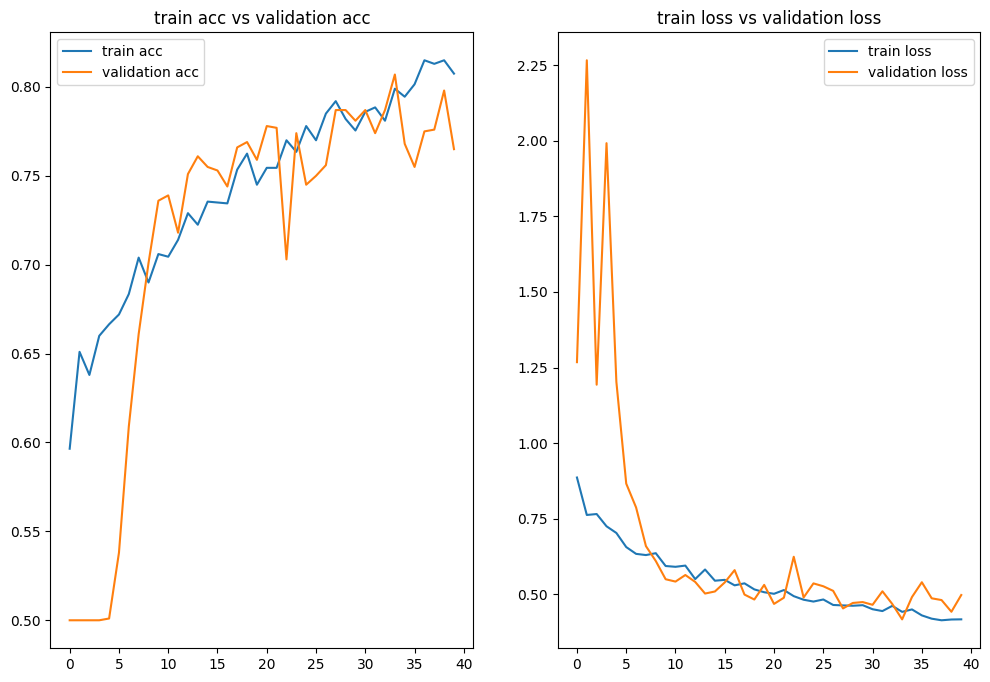

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(epochs),loss_acc,label = "train loss")
plt.plot(np.arange(epochs),val_loss_acc,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


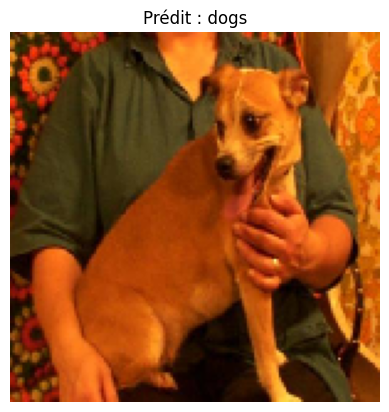

Valeur du modèle: 0.9051
L'animal sur l'image est un : dogs


In [32]:
from pred_alea_img import predict_img
train_generator, validation_generator=creation_generators(train,validation)
pred = predict_img(model, train_generator, train, target_size=(150,150))

Notre modèle apprend bien